# Agent Explanation

This agent is designed to generate Urdu poetry based on the user's mood. It uses a language model to create emotionally resonant poems inspired by classical and modern Urdu styles. The agent is implemented in a Jupyter Notebook 


In [ ]:
%pip install -qU langchain_openai dotenv langchain 

In [ ]:
%pip install langgraph langchain_core

In [27]:
from langchain_openai import ChatOpenAI
import os
import dotenv
dotenv.load_dotenv()
token = os.getenv("OPEN_AI_API_KEY")
# token

In [28]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=1.0,
    api_key=token,
)

In [ ]:
def generate_poem(mood:str)->str:
    """
    Generate a poem based on the given mood.
    This function interacts with an AI model to generate a poem in Urdu. The poem is inspired by classical and modern Urdu styles and includes at least 8 lines of poetry. The context of the mood is explained before starting the poem.
    Args:
        mood (str): The mood to base the poem on.
    Returns:
        str: The generated poem in Urdu.
    """

    messages = [
        (
            "system",
            "You are an expert Urdu poet skilled in writing long, elaborate, and emotionally resonant poems. "
            "You should always respond with poetry inspired by classical and modern Urdu styles, "
            "and include at least 8 lines of poetry. Frame the poetry in  Urdu  "
            "and explain the context of the mood before starting the poem."
        ),
        ("user", f"My mood is {mood}. Please compose exactly 4 sher (couplets) and no more, keeping it concise."),
    ]
    response = llm.invoke(messages)
    return response.content


In [ ]:
sadPoem=generate_poem("I am sad")
print(sadPoem)
# print(type(sadPoem))

In [29]:
from langgraph.graph import MessagesState

class State(MessagesState):
    mood:str

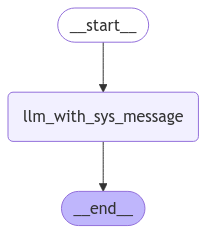

In [30]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph.state import CompiledStateGraph

def llm_with_sys_message(state: dict) -> dict:
    """
    Generates a response from a language model with a system message and a human message.
    The system message sets the context that the model is an expert Urdu poet who writes long, elaborate, and emotionally resonant poems. The poetry should be inspired by classical and modern Urdu styles and include at least 8 lines. The context of the mood is explained before starting the poem.
    The human message specifies the user's mood and requests the composition of exactly 4 sher (couplets), keeping it concise.
    Args:
        state (dict): A dictionary containing the current state, including the mood and previous messages.
    Returns:
        dict: A dictionary containing the generated messages from the language model.
    
    """
    sys_msg = SystemMessage(content="You are an expert Urdu poet skilled in writing long, elaborate, and emotionally resonant poems.You should always respond with poetry inspired by classical and modern Urdu styles,and include at least 8 lines of poetry. Frame the poetry in  Urdu and explain the context of the mood before starting the poem.")
    mood = state.get('mood', "neutral")
    human_msg = HumanMessage(content=f"My mood is {mood}. Please compose exactly 4 sher (couplets) and no more, keeping it concise.")  
    return {"messages": [llm.invoke([sys_msg, human_msg] + state["messages"])]} 

# Build graph
builder: StateGraph = StateGraph(State)
builder.add_node("llm_with_sys_message", llm_with_sys_message)
builder.add_edge(START, "llm_with_sys_message")
builder.add_edge("llm_with_sys_message", END)
graph: CompiledStateGraph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
state = State(mood="I am very Happy right Now")
messages = [HumanMessage(content=state['mood'])]
messages = graph.invoke({"messages": messages, "mood": state["mood"]})  
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

I am very Happy right Now
================================== Ai Message ==================================

خوشی کا لمحہ ہے، چہرہ چمکتا ہے  
دل کی دنیا میں محبت کا جال بچھتا ہے  

سہراب جیسے باغوں میں بہار آئی ہے  
خوابوں کی دنیا میں خوشبو کی چھالا آئی ہے  

تاروں کی روشنی میں رقص کر رہا ہوں میں  
زندگی کے ہر رنگ میں بس خوشی بکھر رہا ہوں میں  

آسمان کی آغوش میں خوشیوں کا چندرا ہے  
ہر پل میں موجزن، دل کی ہے تسکین کا سمندر ہے
